<a href="https://colab.research.google.com/github/shamilkv-623/Stochastic-Calculus-models-in-finance/blob/main/STOCHASTIC_CALCULUS_GBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

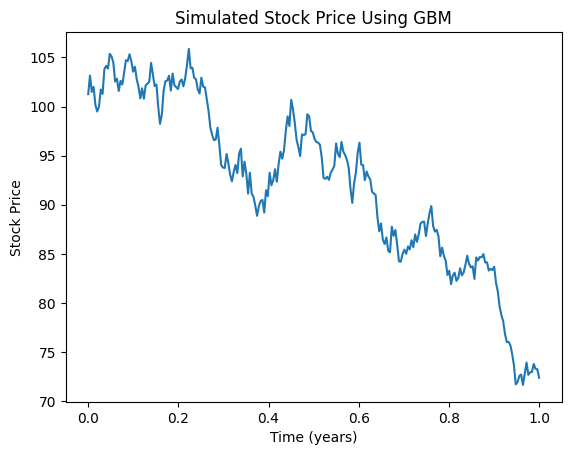

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_gbm(S0, mu, sigma, T, dt):
    N = int(T / dt)
    t = np.linspace(0, T, N)
    W = np.random.randn(N) * np.sqrt(dt)
    W = np.cumsum(W)  # Cumulative sum to simulate Brownian motion
    S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)
    return t, S

# Parameters
S0 = 100  # initial stock price
mu = 0.05  # drift (annual return)
sigma = 0.2  # volatility
T = 1  # time period in years
dt = 1/252  # daily time steps (assuming 252 trading days)

t, S = simulate_gbm(S0, mu, sigma, T, dt)

# Plot simulated stock price path
plt.plot(t, S)
plt.title("Simulated Stock Price Using GBM")
plt.xlabel("Time (years)")
plt.ylabel("Stock Price")
plt.show()


# Loading the data

In [1]:
import yfinance as yf

# Download historical data for a stock (e.g., Apple)
stock_data = yf.download('TSLA', start='2018-01-01', end='2024-01-01')

# Calculate daily returns and moving averages
stock_data['Return'] = stock_data['Adj Close'].pct_change()
stock_data['SMA_50'] = stock_data['Adj Close'].rolling(window=50).mean()
stock_data['SMA_200'] = stock_data['Adj Close'].rolling(window=200).mean()

# Drop rows with NaN values
stock_data.dropna(inplace=True)


[*********************100%***********************]  1 of 1 completed


In [4]:
stock_data.dtypes

,,0
Price,Ticker,
Adj Close,TSLA,float64
Close,TSLA,float64
High,TSLA,float64
Low,TSLA,float64
Open,TSLA,float64
Volume,TSLA,int64
Return,,float64
SMA_50,,float64
SMA_200,,float64


In [5]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1310 entries, 2018-10-16 to 2023-12-29
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, TSLA)  1310 non-null   float64
 1   (Close, TSLA)      1310 non-null   float64
 2   (High, TSLA)       1310 non-null   float64
 3   (Low, TSLA)        1310 non-null   float64
 4   (Open, TSLA)       1310 non-null   float64
 5   (Volume, TSLA)     1310 non-null   int64  
 6   (Return, )         1310 non-null   float64
 7   (SMA_50, )         1310 non-null   float64
 8   (SMA_200, )        1310 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 102.3 KB


# predicting the estimate of the geometric brownian motion

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error




# loading the datasets

In [8]:
# Download historical data for Tesla (TSLA)
stock_data = yf.download('TSLA', start='2018-01-01', end='2024-01-01')

#Calculate the log returns
stock_data['Log_Returns'] = np.log(stock_data['Adj Close'] / stock_data['Adj Close'].shift(1))



[*********************100%***********************]  1 of 1 completed


In [10]:
stock_data.isna().sum()

,,0
Price,Ticker,
Adj Close,TSLA,0
Close,TSLA,0
High,TSLA,0
Low,TSLA,0
Open,TSLA,0
Volume,TSLA,0
Log_Returns,,1


In [11]:
stock_data.dropna(inplace=True)

# feature enginering

In [12]:
# Create rolling features like moving average and moving standard deviation for the past 30 days
stock_data['Rolling_Mean'] = stock_data['Log_Returns'].rolling(window=30).mean()
stock_data['Rolling_Std'] = stock_data['Log_Returns'].rolling(window=30).std()

In [13]:
stock_data.isna().sum()

,,0
Price,Ticker,
Adj Close,TSLA,0
Close,TSLA,0
High,TSLA,0
Low,TSLA,0
Open,TSLA,0
Volume,TSLA,0
Log_Returns,,0
Rolling_Mean,,29
Rolling_Std,,29


In [14]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1508 entries, 2018-01-03 to 2023-12-29
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, TSLA)  1508 non-null   float64
 1   (Close, TSLA)      1508 non-null   float64
 2   (High, TSLA)       1508 non-null   float64
 3   (Low, TSLA)        1508 non-null   float64
 4   (Open, TSLA)       1508 non-null   float64
 5   (Volume, TSLA)     1508 non-null   int64  
 6   (Log_Returns, )    1508 non-null   float64
 7   (Rolling_Mean, )   1479 non-null   float64
 8   (Rolling_Std, )    1479 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 117.8 KB


In [15]:
stock_data.dropna(inplace=True)

Assign the target variable and feature variable

In [16]:
X = stock_data[['Rolling_Mean', 'Rolling_Std']].values  # Features: mean and std of returns
y_mu = stock_data['Rolling_Mean']
y_sigma = stock_data['Rolling_Std']

In [25]:
x_train, x_test, y_mu_train, y_mu_test, y_sigma_train, y_sigma_test = train_test_split(
                                               X, y_mu, y_sigma, test_size=0.2, random_state=42)

Different machine learning model and its implementation

# linear regression

In [18]:
from sklearn.linear_model import LinearRegression


In [26]:
model_mu = LinearRegression()
model_mu.fit(x_train, y_mu_train)

model_sigma = LinearRegression()
model_sigma.fit(x_train, y_sigma_train)

LinearRegression()

In [27]:
# predictions
mu_pred = model_mu.predict(x_test)
sigma_pred = model_sigma.predict(x_test)

In [30]:
mse_mu = mean_squared_error(y_mu_test, mu_pred)
mse_sigma = mean_squared_error(y_sigma_test, sigma_pred)



In [31]:
# Output results
print(f"Mean Squared Error (Drift, mu): {mse_mu}")
print(f"Mean Squared Error (Volatility, sigma): {mse_sigma}")

# Print estimated parameters
estimated_mu = model_mu.coef_[0]
estimated_sigma = model_sigma.coef_[0]

print(f"Estimated Drift (mu): {estimated_mu}")
print(f"Estimated Volatility (sigma): {estimated_sigma}")

Mean Squared Error (Drift, mu): 6.213345964704307e-36
Mean Squared Error (Volatility, sigma): 5.1056866415261495e-34
Estimated Drift (mu): 0.9999999999999999
Estimated Volatility (sigma): 1.3006394917857826e-16


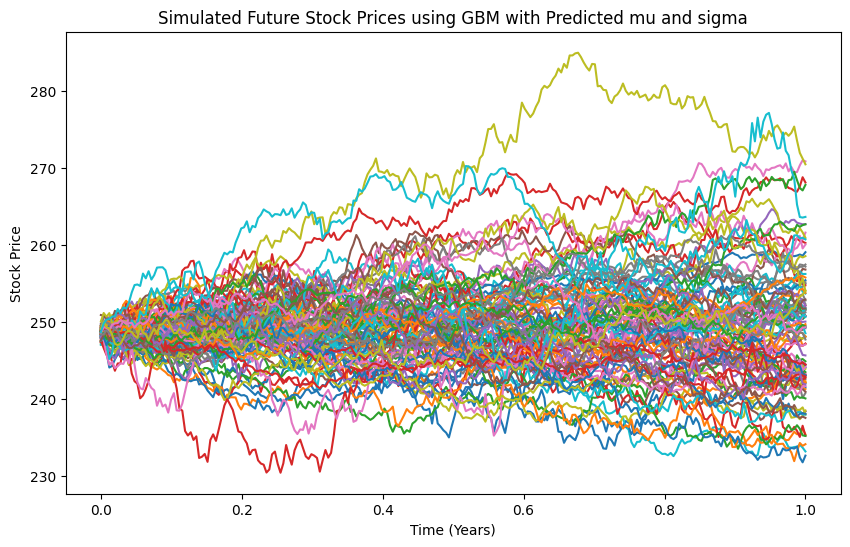

In [37]:


S0 = stock_data['Adj Close'].iloc[-1]  # Last price in the historical data
S0 = S0.item()

#Define simulation parameters
T = 1  # Time horizon in years (1 year)
n_steps = 252  # Number of steps (e.g., trading days in a year)
n_simulations = 100  # Number of simulations (for diversity)

#  Simulate future stock prices using GBM with predicted mu and sigma
dt = T / n_steps  # Time step
future_prices = np.zeros((n_simulations, n_steps))  # Array to hold simulated prices

# Loop to simulate multiple future price paths
for i in range(n_simulations):
    # Use the predicted values of mu and sigma for each simulation
    mu = mu_pred[i % len(mu_pred)]  # Choose a mu from the predictions
    sigma = sigma_pred[i % len(sigma_pred)]  # Choose a sigma from the predictions

    # Generate random walk (Wiener process)
    W = np.random.normal(0, 1, n_steps)  # Normal distribution for the random walk
    W = np.cumsum(W) * np.sqrt(dt)  # Cumulative sum to get the Wiener process path

    # Apply the GBM formula to simulate future prices
    future_prices[i, :] = S0 * np.exp((mu - 0.5 * sigma**2) * np.linspace(0, T, n_steps) + sigma * W)

# Plot the simulated future prices
plt.figure(figsize=(10, 6))
for i in range(n_simulations):
    plt.plot(np.linspace(0, T, n_steps), future_prices[i, :], label=f'Simulation {i+1}')
plt.title('Simulated Future Stock Prices using GBM with Predicted mu and sigma')
plt.xlabel('Time (Years)')
plt.ylabel('Stock Price')
plt.show()


In [38]:
# Calculate Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) for each simulation
mse = []
rmse = []

for i in range(n_simulations):
    # Get the simulated prices for the current simulation
    simulated_prices = future_prices[i, :]

    # Align the simulation with the actual data (same length)
    if len(simulated_prices) > len(actual_data):
        simulated_prices = simulated_prices[:len(actual_data)]

    # Compute MSE and RMSE
    mse.append(mean_squared_error(actual_data, simulated_prices))
    rmse.append(sqrt(mean_squared_error(actual_data, simulated_prices)))

# Determine the best simulation by MSE or RMSE
best_simulation_index = np.argmin(mse)  # Choose the simulation with the lowest MSE

# Print the results
print(f"Best simulation based on MSE: Simulation {best_simulation_index + 1}")
print(f"MSE: {mse[best_simulation_index]}, RMSE: {rmse[best_simulation_index]}")

Best simulation based on MSE: Simulation 74
MSE: 2268.2129743042833, RMSE: 47.62575956669125
